In [ ]:
#Árvore de Decisão 

In [2]:
#Importando as Bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import graphviz 
from sklearn.tree import export_graphviz
from yellowbrick.classifier import ConfusionMatrix
import numpy as np

In [3]:
#Carregamento da base de dados e definição dos previsores (variáveis independentes -X) e classe (variável -y)
credito = pd.read_csv('Credit.csv')
credito.shape

(1000, 21)

In [4]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [5]:
previsores = credito.iloc[:,0:20].values
classe = credito.iloc[:,20].values

In [6]:
#Conversão dos atributos categóricos para atributos numéricos, passando o índice de cada atributo categórico
labelencoder = LabelEncoder()
previsores[:,0] = labelencoder.fit_transform(previsores[:,0])
previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
previsores[:,3] = labelencoder.fit_transform(previsores[:,3])
previsores[:,5] = labelencoder.fit_transform(previsores[:,5])
previsores[:,6] = labelencoder.fit_transform(previsores[:,6])
previsores[:,8] = labelencoder.fit_transform(previsores[:,8])
previsores[:,9] = labelencoder.fit_transform(previsores[:,9])
previsores[:,11] = labelencoder.fit_transform(previsores[:,11])
previsores[:,13] = labelencoder.fit_transform(previsores[:,13])
previsores[:,14] = labelencoder.fit_transform(previsores[:,14])
previsores[:,16] = labelencoder.fit_transform(previsores[:,16])
previsores[:,18] = labelencoder.fit_transform(previsores[:,18])
previsores[:,19] = labelencoder.fit_transform(previsores[:,19])

In [7]:
#Divisão da base de dados entre treinamento e teste. Usamos 30% para testar e 70% para treinar. Random_state = 0
#para sempre obter a mesma divisão da base quando o código for executado
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                 classe,
                                                                 test_size=0.3,
                                                                 random_state = 0)

In [8]:
#Criaçao e treinamento do modelo 
arvore = DecisionTreeClassifier()
arvore.fit(X_treinamento, y_treinamento)

DecisionTreeClassifier()

In [9]:
#Exploração da árvore de decisão para formato .dot, para posterior visualização 
export_graphviz(arvore, out_file = 'tree.dot')

In [10]:
#Obtenção das previsões
previsoes = arvore.predict(X_teste)
previsoes

array(['bad', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'good', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'bad', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'bad',
    

In [11]:
#Matriz de confussão 
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 43,  43],
       [ 48, 166]])

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

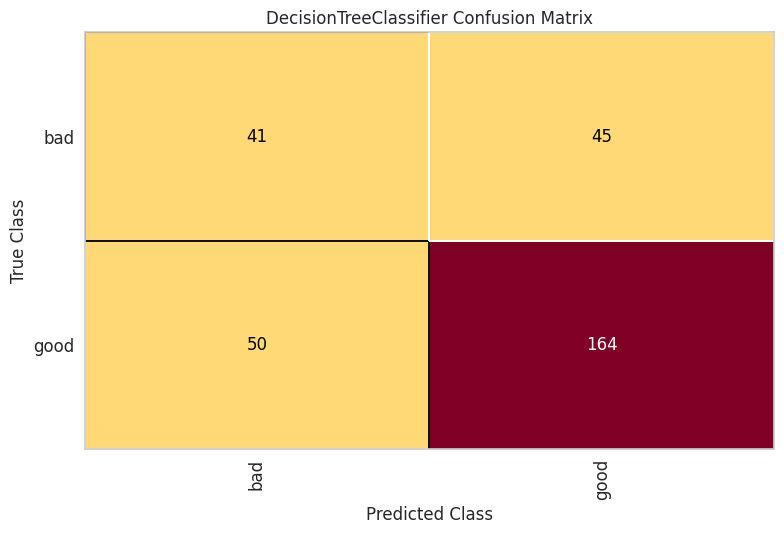

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [12]:
#Visualização da Matriz de Confusão 
v = ConfusionMatrix(DecisionTreeClassifier())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

In [13]:
#Taxa de acerto
taxa_acerto = accuracy_score(y_teste,previsoes)
taxa_acerto

0.6966666666666667

In [14]:
#Taxa erro
taxa_erro = 1 - taxa_acerto
taxa_erro

0.30333333333333334